In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5387,ham,I will be gentle baby! Soon you will be taking...,NaN,NaN,NaN
4407,ham,Take care and sleep well.you need to learn to ...,NaN,NaN,NaN
2492,ham,No drama Pls.i have had enough from you and fa...,NaN,NaN,NaN
2605,ham,\HELLO U.CALL WEN U FINISH WRK.I FANCY MEETIN ...,NaN,NaN,NaN
1208,ham,Also maaaan are you missing out,NaN,NaN,NaN


In [6]:
df.shape


(5572, 5)

In [7]:
#data clean
#EDA
#preprocess
#model build
#evaluation
#modification
#deployment


In [8]:
#data cleaning 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop last three cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)


,v1,v2
5020,ham,:-( sad puppy noise
1781,ham,";-( oh well, c u later"
1246,ham,"I do know what u mean, is the king of not hav..."
1242,ham,Nobody can decide where to eat and dad wants C...
1920,ham,Dont know you bring some food


In [11]:
#rename col for
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(6)

,target,text
2285,ham,"Hi, wkend ok but journey terrible. Wk not good..."
3260,ham,Yup i'm still having coffee wif my frens... My...
3898,ham,ÌÏ mean it's confirmed... I tot they juz say o...
132,ham,First answer my question.
5241,ham,Its a part of checking IQ
323,ham,That would be great. We'll be at the Guild. Co...


In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])  # Replace 'category' with the correct column name



In [13]:
df['target']=encoder.fit_transform(df['transform'])

KeyError: 'transform'

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
#checking duplicates
df.duplicated().sum()

In [ ]:
df= df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

In [ ]:
df.shape

In [ ]:
#EDA
#EDA
df.head()


In [ ]:
df['target'].value_counts()

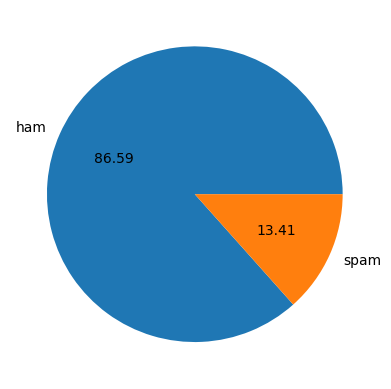

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#data imbalance


In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df['num_characters']=df['text'].apply(len)

In [16]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
#num of words in our data 
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

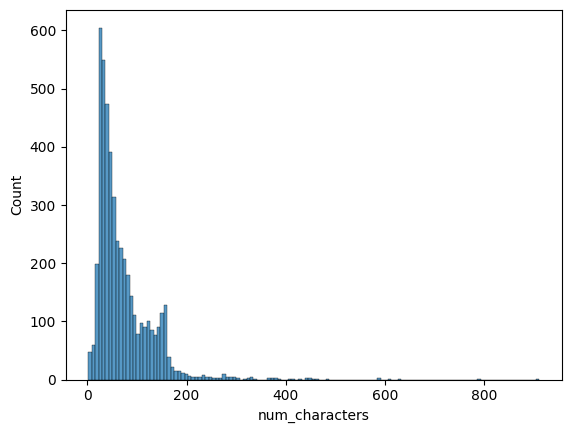

In [27]:
sns.histplot(df[df['target']==0]['num_characters'])

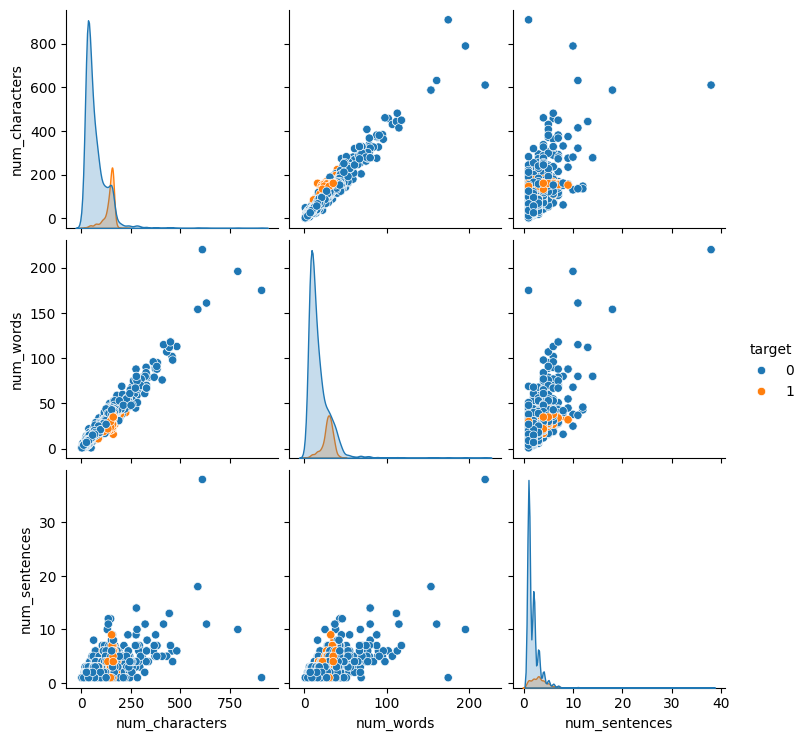

In [29]:
sns.pairplot(df,hue='target')

In [33]:
##data preprocessing 

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

# Test the function
result = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(result)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...


gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data]   Unzipping corpora\stopwords.zip.


In [36]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

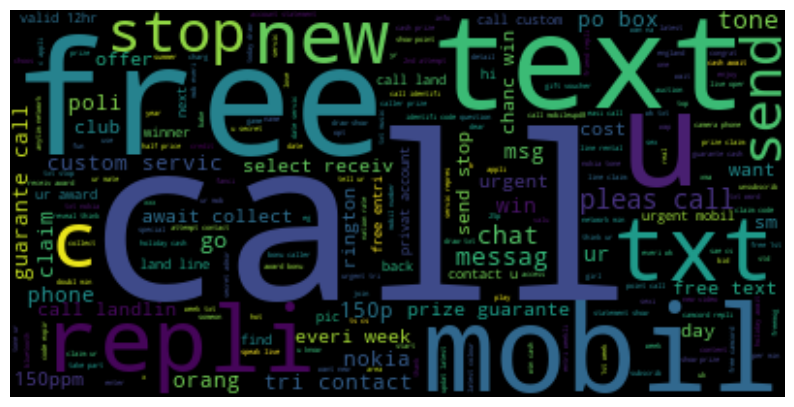

In [48]:
import pandas as pd
from wordcloud import WordCloud

# Ensure 'transformed_text' column is created
df['transformed_text'] = df['text'].apply(transform_text)

# Generate the word cloud for spam messages
spam_wc = WordCloud().generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

# Display the word cloud
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

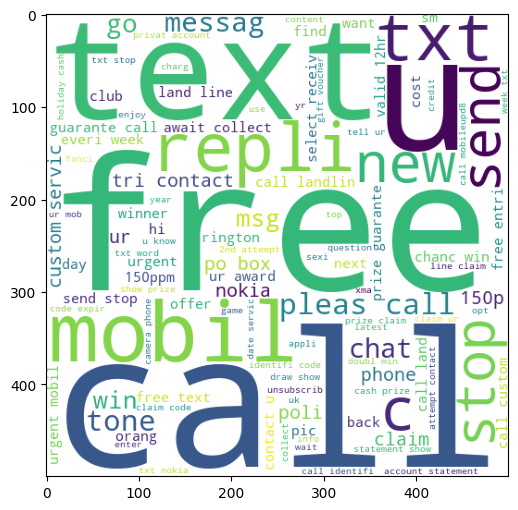

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [58]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

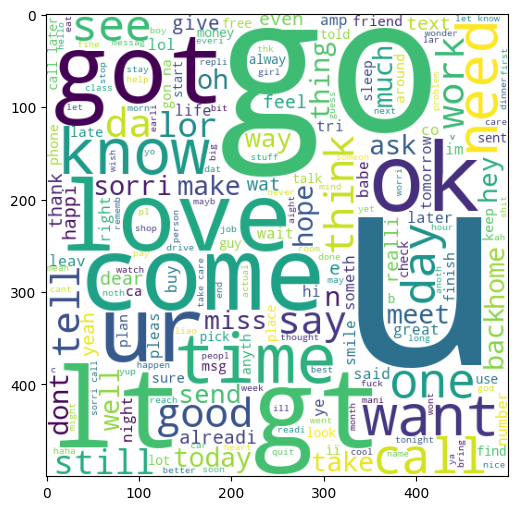

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [62]:
len(spam_corpus)

11490

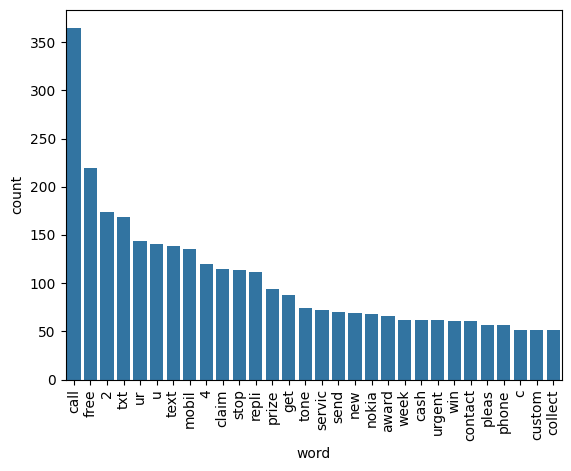

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming spam_corpus is a list of words from spam messages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Get the 30 most common words
common_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [66]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

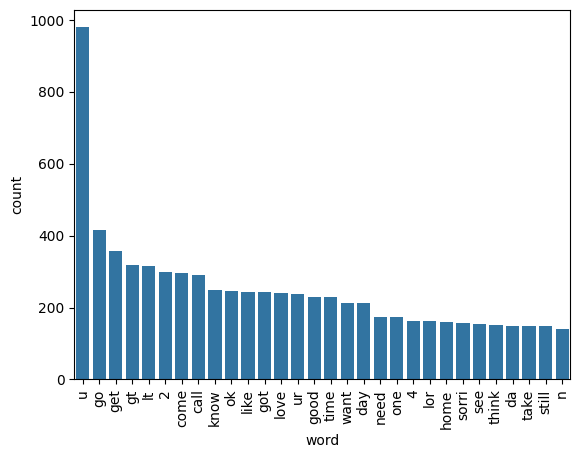

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming ham_corpus is a list of words from non-spam (ham) messages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

# Get the 30 most common words
common_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [70]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [71]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [72]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [73]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [74]:
X.shape

(5572, 3000)

In [75]:
X.shape


(5572, 3000)

In [76]:
y = df['target'].values

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [80]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [81]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672645739910314
[[841 116]
 [ 32 126]]
0.5206611570247934


In [82]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [83]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748878923766816
[[955   2]
 [ 26 132]]
0.9850746268656716


In [84]:
# tfidf --> MNB

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [87]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [88]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [90]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision
    

In [91]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9713004484304932, 0.9846153846153847)

In [92]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9713004484304932
Precision -  0.9846153846153847
For  KN
Accuracy -  0.9040358744394619
Precision -  1.0
For  NB
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827
For  DT
Accuracy -  0.9255605381165919
Precision -  0.8865979381443299
For  LR
Accuracy -  0.9515695067264573
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9659192825112107
Precision -  0.9838709677419355
For  AdaBoost
Accuracy -  0.9596412556053812
Precision -  0.959349593495935
For  BgC
Accuracy -  0.95695067264574
Precision -  0.9166666666666666
For  ETC
Accuracy -  0.9713004484304932
Precision -  0.9921875
For  GBDT
Accuracy -  0.9363228699551569
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9614349775784753
Precision -  0.967479674796748


In [96]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [97]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904036,1.000000
8,ETC,0.971300,0.992188
2,NB,0.965022,0.991736
0,SVC,0.971300,0.984615
5,RF,0.965919,0.983871
10,xgb,0.961435,0.967480
4,LR,0.951570,0.964286
6,AdaBoost,0.959641,0.959350
9,GBDT,0.936323,0.930693
7,BgC,0.956951,0.916667


In [98]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [99]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904036
1,ETC,Accuracy,0.971300
2,NB,Accuracy,0.965022
3,SVC,Accuracy,0.971300
4,RF,Accuracy,0.965919
5,xgb,Accuracy,0.961435
6,LR,Accuracy,0.951570
7,AdaBoost,Accuracy,0.959641
8,GBDT,Accuracy,0.936323
9,BgC,Accuracy,0.956951


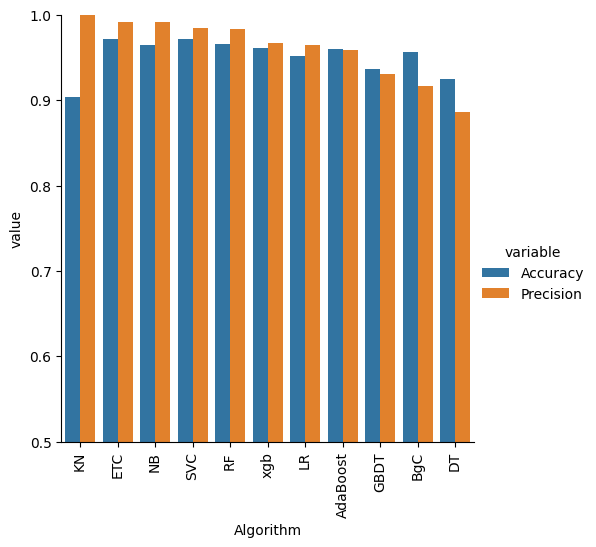

In [100]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [101]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [103]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [104]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [105]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [106]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [107]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [108]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904036,1.000000,0.904036,1.000000,0.904036,1.000000,0.904036,1.000000
1,ETC,0.971300,0.992188,0.971300,0.992188,0.971300,0.992188,0.971300,0.992188
2,NB,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736
3,SVC,0.971300,0.984615,0.971300,0.984615,0.971300,0.984615,0.971300,0.984615
4,RF,0.965919,0.983871,0.965919,0.983871,0.965919,0.983871,0.965919,0.983871
5,xgb,0.961435,0.967480,0.961435,0.967480,0.961435,0.967480,0.961435,0.967480
6,LR,0.951570,0.964286,0.951570,0.964286,0.951570,0.964286,0.951570,0.964286
7,AdaBoost,0.959641,0.959350,0.959641,0.959350,0.959641,0.959350,0.959641,0.959350
8,GBDT,0.936323,0.930693,0.936323,0.930693,0.936323,0.930693,0.936323,0.930693
9,BgC,0.956951,0.916667,0.956951,0.916667,0.956951,0.916667,0.956951,0.916667


In [109]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [110]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [130]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [112]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9775784753363229
Precision 1.0


In [125]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [126]:
from sklearn.ensemble import StackingClassifier

In [127]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [128]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9802690582959641
Precision 0.9788732394366197


In [129]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))